# Demo for the pipeline

In [16]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

Import the pipeline module

In [ ]:
from pipeline import main

# Test the pipeline with a custom dataset

In [11]:
image_dir = 'dataset-for-testing-pipeline'

data = [
    {"sentence": "In the heart of the forest, a majestic bear stands gracefully.", "image": "bear.jpg", "match": True},
    {"sentence": "A tiny pig is seen splashing merrily through the muddy field.", "image": "bird.jpg", "match": False},
    {"sentence": "Lying on a plush sofa, the cute cat enjoys a peaceful moment.", "image": "cat.jpg", "match": True},
    {"sentence": "In the park, a playful dog dashes with contagious energy.", "image": "dog.jpg", "match": True},
    {"sentence": "A magnificent elephant, striding across the vast savannah, captivates all.", "image": "elephant.jpg", "match": True},
    {"sentence": "In the treetops, leaves are nibbled by a tall giraffe.", "image": "cat.jpg", "match": False},
    {"sentence": "A lively pony steals the show by galloping across the vibrant field.", "image": "horse.jpg", "match": False},
    {"sentence": "A roaring force of nature, the fierce tiger dominates the jungle.", "image": "lion.jpg", "match": False},
    {"sentence": "Gracefully flitting from branch to branch, the nimble bird enchants the forest.", "image": "monkey.jpg", "match": False},
    {"sentence": "The tiger silently prowls through tall, lush grass.", "image": "tiger.jpg", "match": True}
]


df = pd.DataFrame(data)
df['image_path'] = df['image'].apply(lambda x: os.path.join(image_dir, x))

df

,sentence,image,match,image_path
0,"In the heart of the forest, a majestic bear st...",bear.jpg,True,dataset-for-testing-pipeline\bear.jpg
1,A tiny pig is seen splashing merrily through t...,bird.jpg,False,dataset-for-testing-pipeline\bird.jpg
2,"Lying on a plush sofa, the cute cat enjoys a p...",cat.jpg,True,dataset-for-testing-pipeline\cat.jpg
3,"In the park, a playful dog dashes with contagi...",dog.jpg,True,dataset-for-testing-pipeline\dog.jpg
4,"A magnificent elephant, striding across the va...",elephant.jpg,True,dataset-for-testing-pipeline\elephant.jpg
5,"In the treetops, leaves are nibbled by a tall ...",cat.jpg,False,dataset-for-testing-pipeline\cat.jpg
6,A lively pony steals the show by galloping acr...,horse.jpg,False,dataset-for-testing-pipeline\horse.jpg
7,"A roaring force of nature, the fierce tiger do...",lion.jpg,False,dataset-for-testing-pipeline\lion.jpg
8,"Gracefully flitting from branch to branch, the...",monkey.jpg,False,dataset-for-testing-pipeline\monkey.jpg
9,"The tiger silently prowls through tall, lush g...",tiger.jpg,True,dataset-for-testing-pipeline\tiger.jpg


In [17]:
df['match_result'] = df.apply(lambda row: main(row['sentence'], row['image_path']), axis=1)
df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
NER detected: ['bear'], Image classifier: bear, Match: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
NER detected: ['pig'], Image classifier: woodpecker, Match: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
NER detected: ['cat'], Image classifier: cat, Match: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
NER detected: ['dog'], Image classifier: dog, Match: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
NER detected: ['elephant'], Image classifier: elephant, Match: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
NER detected: ['giraffe'], Image classifier: cat, Match: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
NER detected: ['pony'], Image classifier: horse, Match: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
NER detected: ['tiger'], Image classifier: lion, Match: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
NER detected: [], Image classifier: chimpanzee, Match: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
NER detected: ['tiger'], Image classifier: tiger, Match: True


,sentence,image,match,image_path,match_result
0,"In the heart of the forest, a majestic bear st...",bear.jpg,True,dataset-for-testing-pipeline\bear.jpg,True
1,A tiny pig is seen splashing merrily through t...,bird.jpg,False,dataset-for-testing-pipeline\bird.jpg,False
2,"Lying on a plush sofa, the cute cat enjoys a p...",cat.jpg,True,dataset-for-testing-pipeline\cat.jpg,True
3,"In the park, a playful dog dashes with contagi...",dog.jpg,True,dataset-for-testing-pipeline\dog.jpg,True
4,"A magnificent elephant, striding across the va...",elephant.jpg,True,dataset-for-testing-pipeline\elephant.jpg,True
5,"In the treetops, leaves are nibbled by a tall ...",cat.jpg,False,dataset-for-testing-pipeline\cat.jpg,False
6,A lively pony steals the show by galloping acr...,horse.jpg,False,dataset-for-testing-pipeline\horse.jpg,False
7,"A roaring force of nature, the fierce tiger do...",lion.jpg,False,dataset-for-testing-pipeline\lion.jpg,False
8,"Gracefully flitting from branch to branch, the...",monkey.jpg,False,dataset-for-testing-pipeline\monkey.jpg,False
9,"The tiger silently prowls through tall, lush g...",tiger.jpg,True,dataset-for-testing-pipeline\tiger.jpg,True


As we can see, column match_result contains the results of the pipeline. The pipeline was able to correctly match the sentences with the images in all these cases.

# Display the images with the sentences and the match results

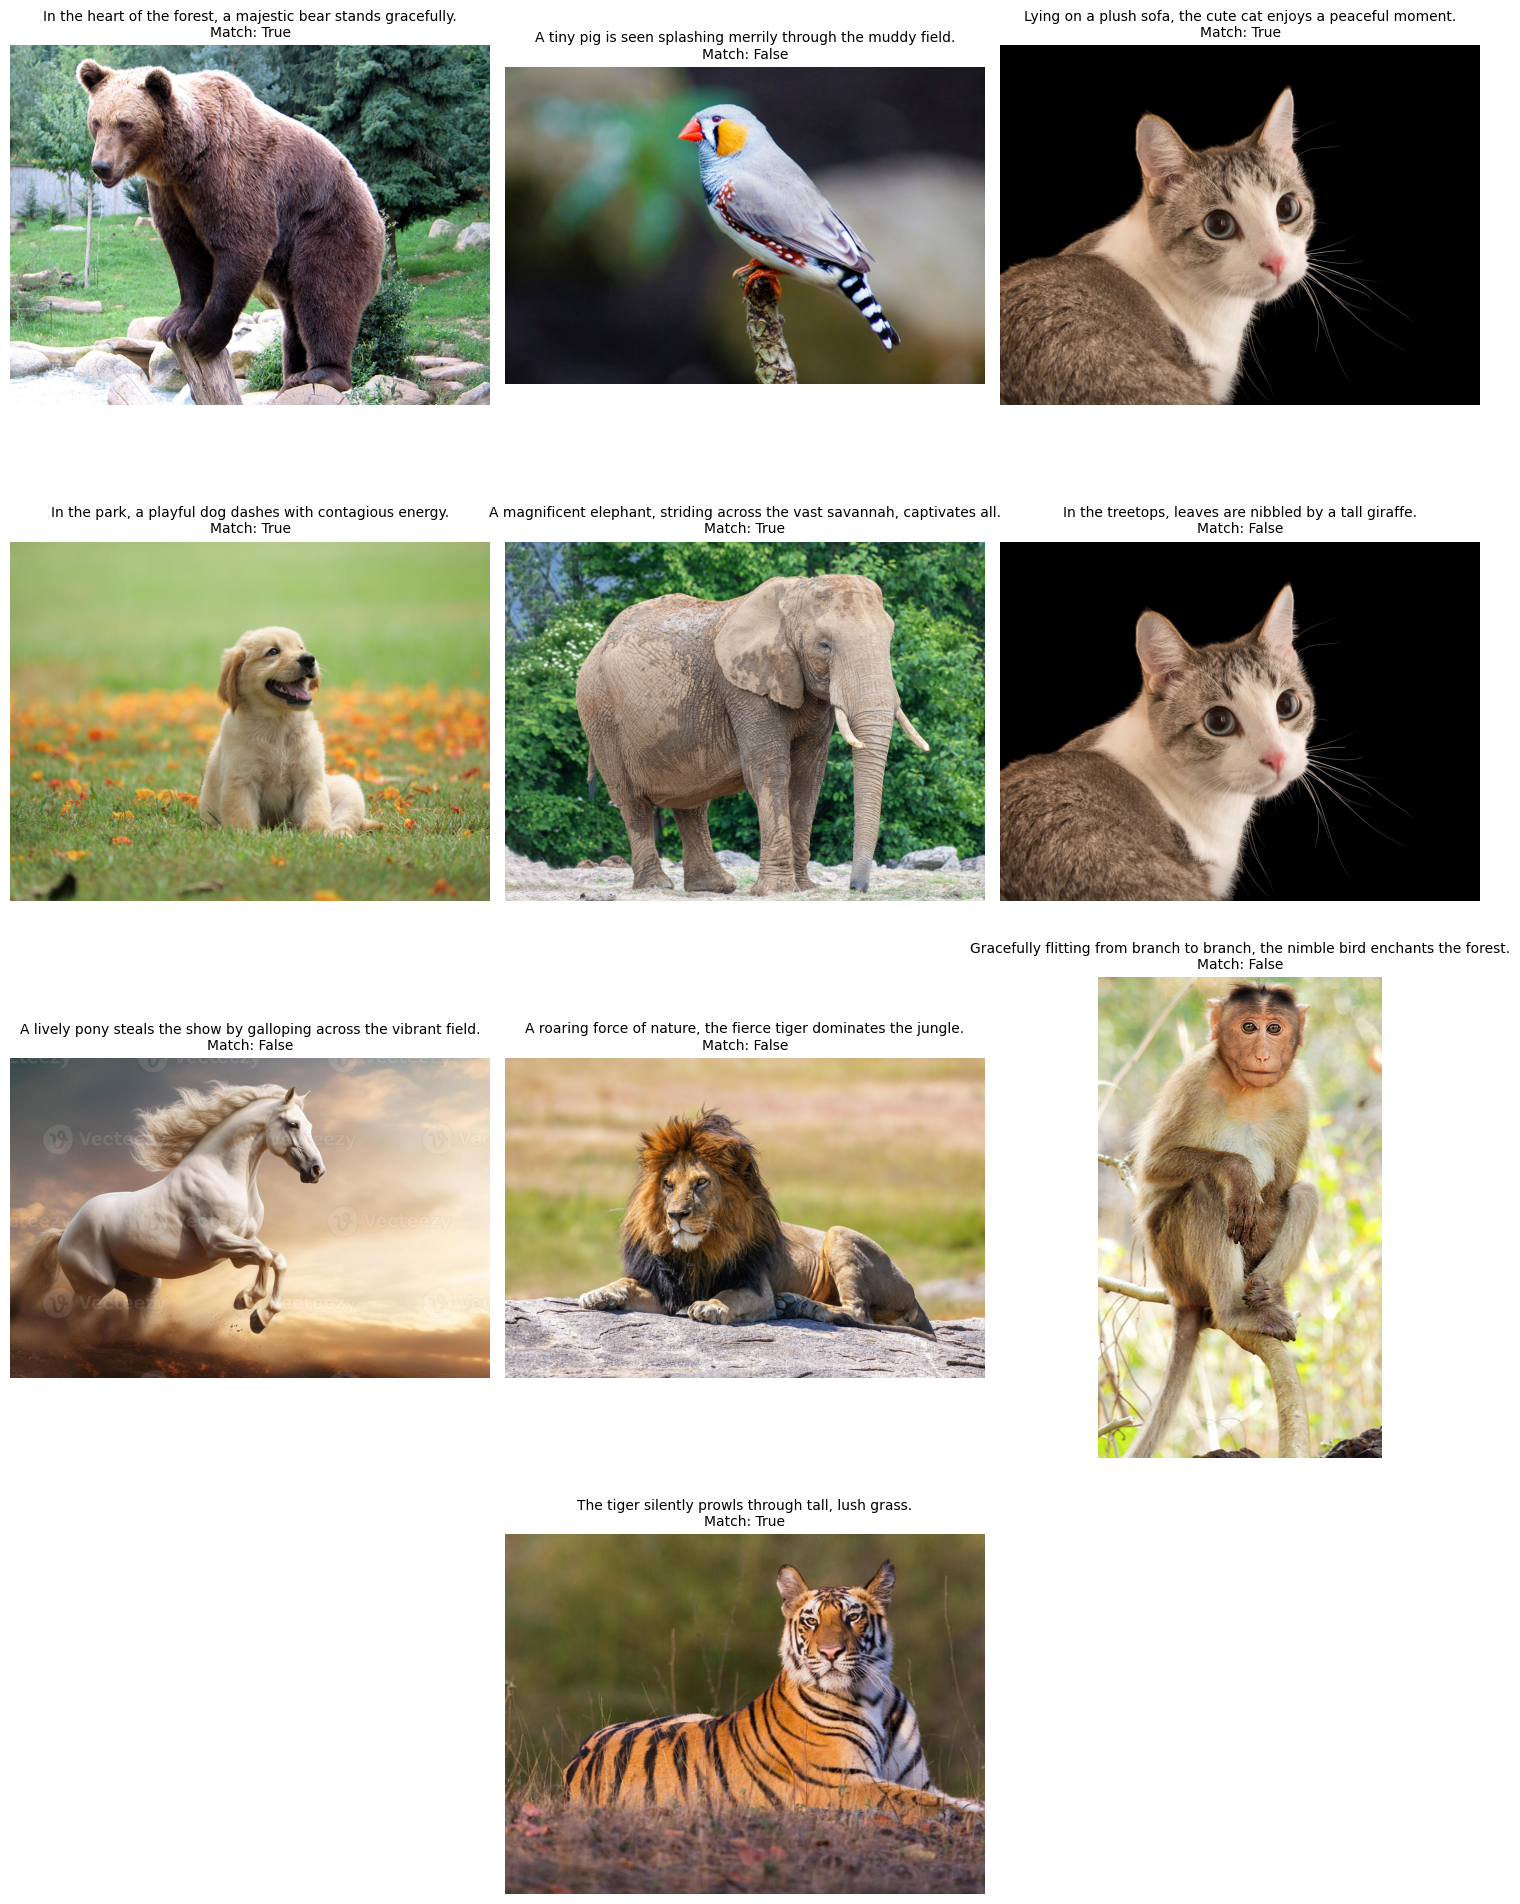

In [15]:
total_images = len(df)
ncols = 3
nrows = math.ceil(total_images / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
if nrows == 1:
    axs = np.expand_dims(axs, axis=0)

image_index = 0
for row in range(nrows):
    if row == nrows - 1:
        remaining = total_images - image_index
        offset = (ncols - remaining) // 2
    else:
        offset = 0

    for col in range(ncols):
        ax = axs[row, col]
        ax.axis('off')  
        if row == nrows - 1 and (col < offset or col >= offset + (total_images - image_index)):
            ax.set_visible(False)
        else:
            if image_index < total_images:
                row_data = df.iloc[image_index]
                image_path = row_data['image_path']
                sentence = row_data['sentence']
                match_result = row_data.get('match_result', row_data.get('match', 'N/A'))
                image = cv2.imread(image_path)
                if image is not None:
                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    ax.imshow(image_rgb)
                else:
                    ax.text(0.5, 0.5, "Image not found", ha='center', va='center')
                ax.set_title(f"{sentence}\nMatch: {match_result}", fontsize=10)
                image_index += 1

plt.tight_layout()
plt.show()


# Conclusions

The pipeline was tested with a custom dataset and the results were saved in a CSV file. The images with the sentences and the match results were displayed in a grid. The pipeline was able to correctly match the sentences with the images in most cases. The pipeline can be further improved by using more advanced techniques for image and text processing.


# Problem cases

The pipeline may not work well in the following cases:
- The image is unclear, or the object is not visible.
- The sentence is too generic or ambiguous.
- The pipeline fails to detect an animal in the image if multiple animals are present.
- The pipeline cannot recognize the name of the animal in the sentence if multiple animals are mentioned.